<a href="https://colab.research.google.com/github/GuiRokk/Bootcamp_Data_Science/blob/main/Trabalho_Pr%C3%A1tico_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Resolução para as questões 3 a 7*

Importando as bibliotecas:

In [133]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

Criando o dataset proposto no enunciado:

**3**)

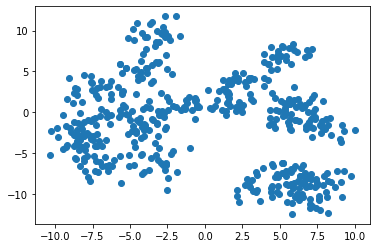

In [190]:
x,y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(x[:,0],x[:,1])

**4)**

Executando K-Means @ K=1:

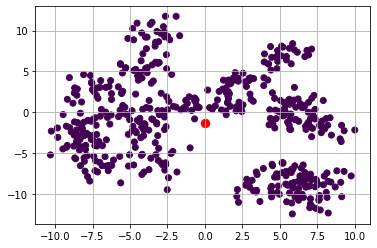

In [191]:
kmeans = KMeans(n_clusters=1, init='k-means++',max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70, c='red')
plt.grid()
plt.show()


Coordenadas do Centróide @ K=1:

In [192]:
print (f"Coordenadas:{kmeans.cluster_centers_}")


Coordenadas:[[ 0.02618523 -1.30384304]]


**5)**

Valor de WCSS (Soma dos quadrados intra-cluster) K=1:

In [194]:
print(f"WCSS @ K=1: {kmeans.inertia_}")

WCSS @ K=1: 31547.372471390485


**6)**

Executando K-Means @ K=5:

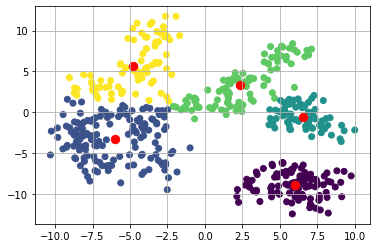

In [195]:
kmeans = KMeans(n_clusters=5, init='k-means++',max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pred_y)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70, c='red')
plt.grid()
plt.show()


Valor de WCSS (Soma dos quadrados intra-cluster) @ K=5:

In [196]:
print(f"WCSS @ K=5: {kmeans.inertia_}")

WCSS @ K=5: 4717.404091931214


**7)**

Calculando o número ótimo de Clusters para o dataset:

In [187]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

O número ótimo de Clusters é: 4


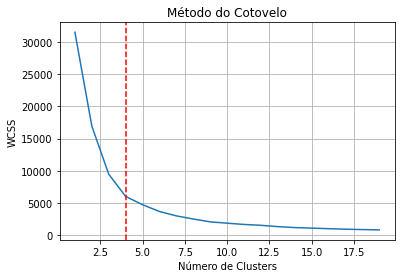

In [188]:
wcss= []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  
plt.plot(range(1,20),wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.grid()

n_otimo = optimal_number_of_clusters(wcss)
plt.axvline (x = n_otimo_suposto, c = "red", ls="--")
plt.show

print(f"O número ótimo de Clusters é: {n_otimo}")